<center><h1>WeiChieh_Chen Mini-Project for ML & Data Engineer Position</h1></center>
<br>
<center><font size="4">Instagram Data</font></center>

### (a) Download Data

Package imports

In [24]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

import statsmodels.api as sm
from ISLP.models import summarize



In [3]:
file_path = '../data/instagram_data.csv'
df = pd.read_csv(file_path)
df

,likes,no_of_comments,t,follower_count_at_t,image_path
0,154552,0,1594174009,40934474,../Data/insta_data/0.jpg
1,97386,0,1593571666,40934474,../Data/insta_data/2.jpg
2,145632,0,1593136341,40934474,../Data/insta_data/4.jpg
3,76461,0,1592981047,40934474,../Data/insta_data/6.jpg
4,174620,0,1592703461,40934474,../Data/insta_data/8.jpg
...,...,...,...,...,...
3780,341895,6029,1555164674,4229627,../Data/insta_data/9435.jpg
3781,217095,2591,1554706282,4229627,../Data/insta_data/9436.jpg
3782,17902,253,1553945996,4229627,../Data/insta_data/9437.jpg
3783,141694,1175,1552645088,4229627,../Data/insta_data/9442.jpg


check the number of images and make sure no repeated images

In [4]:
df['image_path'].count()

np.int64(3785)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots(pairplot)

Take a look at the scatter plot and histogram
 - no_of_comments seems to have some correlation with likes, filter out the points with no_of_comments > 1.6e6 to see better
 - t and follower_count_at_t look like just time stamp and has no relation to the likes

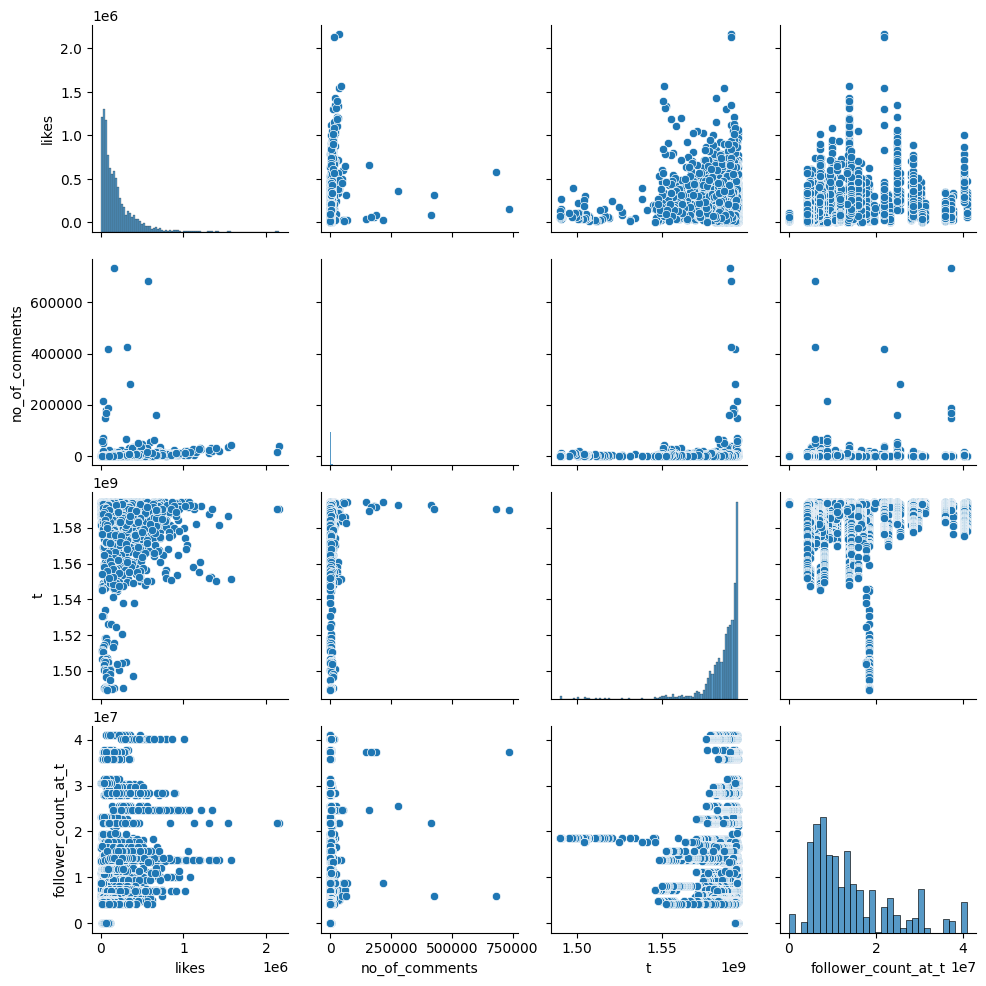

In [5]:
sns.pairplot(df)

filter out no_of_comment > 1.6e5 and redraw the plot
- no_of_comments do have some relationship with the likes

       likes  no_of_comments           t  follower_count_at_t  \
0     154552               0  1594174009             40934474   
1      97386               0  1593571666             40934474   
2     145632               0  1593136341             40934474   
3      76461               0  1592981047             40934474   
4     174620               0  1592703461             40934474   
...      ...             ...         ...                  ...   
3780  341895            6029  1555164674              4229627   
3781  217095            2591  1554706282              4229627   
3782   17902             253  1553945996              4229627   
3783  141694            1175  1552645088              4229627   
3784   95348             675  1551937608              4229627   

                       image_path  
0        ../Data/insta_data/0.jpg  
1        ../Data/insta_data/2.jpg  
2        ../Data/insta_data/4.jpg  
3        ../Data/insta_data/6.jpg  
4        ../Data/insta_data/8.jpg  
...

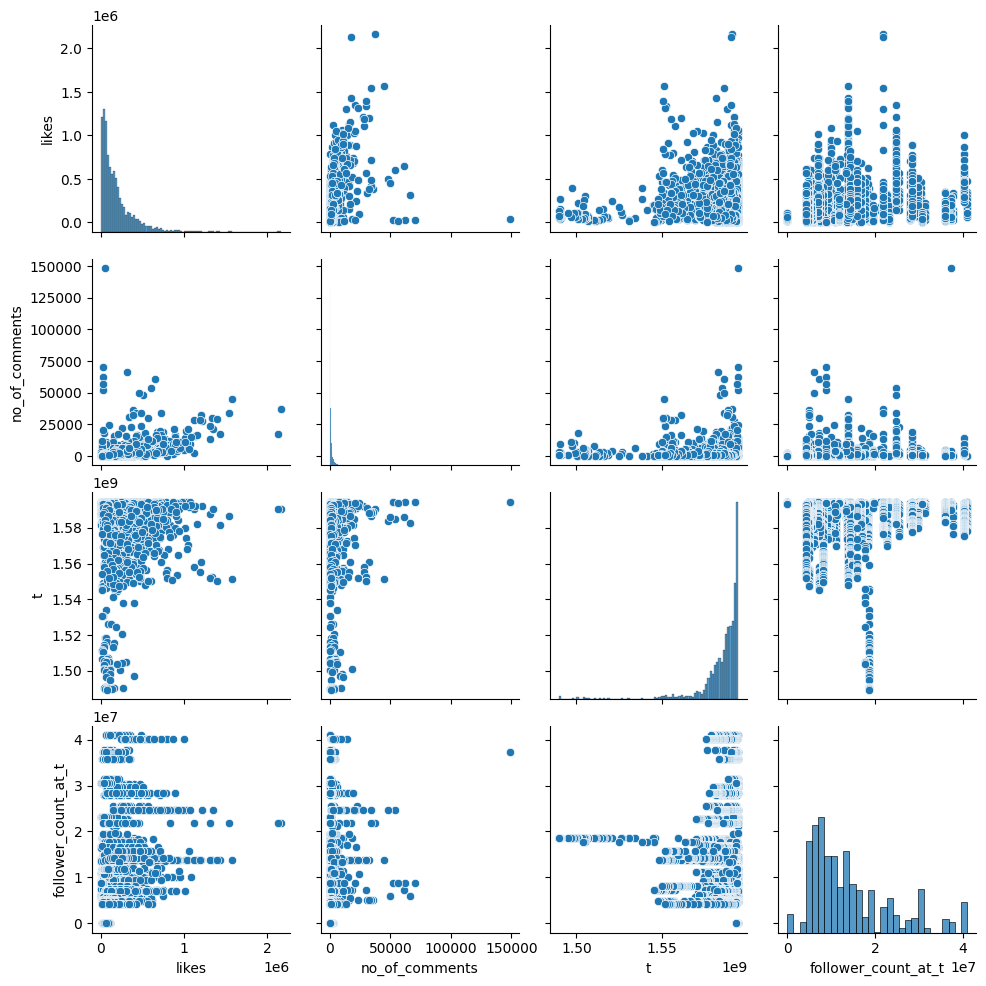

In [6]:
filtered_df = df[df['no_of_comments'] < 1.6e5]
print(filtered_df)
sns.pairplot(filtered_df)


#### ii. Boxplots

Take a look at the box plot
 - Another view to observe how the no_of_comments are relating to likes

/Users/Ray/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/Ray/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/Ray/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/Ray/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette=

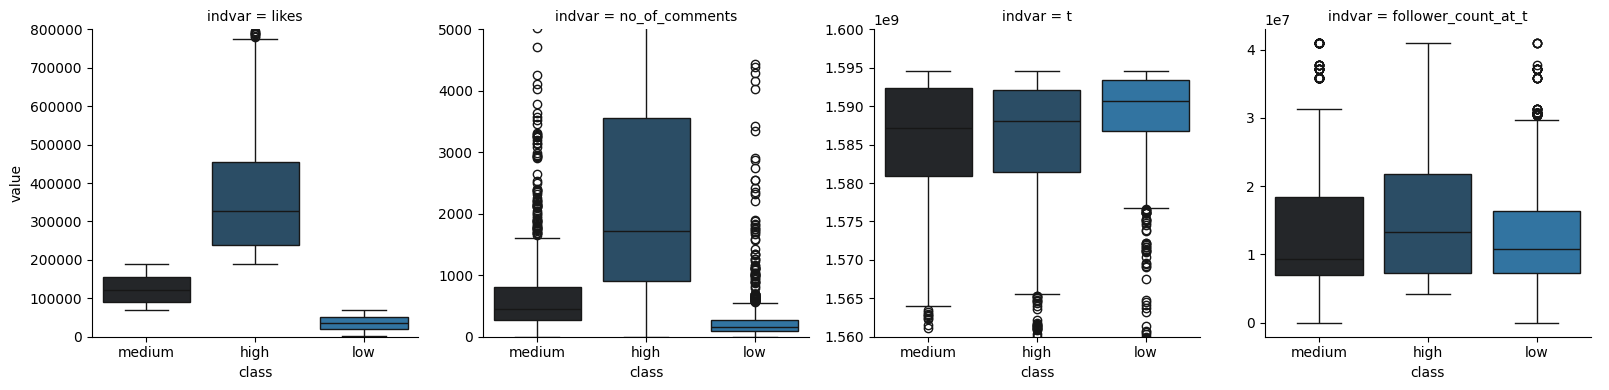

In [7]:
# Define thresholds using percentiles
low_threshold = filtered_df['likes'].quantile(0.33)  # 33rd percentile
high_threshold = filtered_df['likes'].quantile(0.66)  # 66th percentile

# Define a function to classify likes
def classify_likes(likes):
    if likes < low_threshold:
        return 'low'
    elif likes < high_threshold:
        return 'medium'
    else:
        return 'high'

# Apply the classification to the 'likes' column
filtered_df_temp = filtered_df.copy()
filtered_df_temp['class'] = filtered_df_temp['likes'].apply(classify_likes)

filtered_df_temp.drop(columns=['image_path'], inplace=True)


# Melt the DataFrame for better visualization
filtered_df_melted = filtered_df_temp.melt(id_vars='class', var_name='indvar', value_name='value')
# print(filtered_df_melted )

# Create a FacetGrid in seaborn, the data is going to be plotted in separate boxplot according to their indvar
# sharey=False to make each boxplot has its own scale
fg = sns.FacetGrid(filtered_df_melted, col='indvar', col_wrap=4, height=4, sharey=False)
fg.map_dataframe(sns.boxplot, x='class', y='value', hue='class')

# Adjust y-axis for the 'no_of_comments' plot
for ax, title in zip(fg.axes.flat, fg.col_names):
    if title == 'likes':
        ax.set_ylim(0, 0.8e6) 
    if title == 'no_of_comments':
        ax.set_ylim(0, 5e3) 
    if title == 't':
        ax.set_ylim(1.56e9, 1.6e9)  

fg.set_axis_labels('class', 'value')
fg.add_legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

use statsmodels to do a quick exploration on how each feature's affecting the likes
- no_of_comments do have some relation with the likes
- t is not statistically significant
- though follower_count_at_t is statistically significant, it's influence on the likes is relatively small compared to no_of_comments

conclusion for now: maybe we can fit a linear regression model to predict no_of_comments

In [17]:
x_stats = sm.add_constant(X)
result = sm.OLS(Y, x_stats).fit()
result = summarize(result)
print(result)

                            coef     std err       t  P>|t|
const                773300.0000  337000.000   2.298  0.022
no_of_comments           17.2424       0.579  29.778  0.000
t                        -0.0004       0.000  -1.943  0.052
follower_count_at_t       0.0025       0.000   8.411  0.000


#### iii. Split Data Set

In [8]:
X = filtered_df[['no_of_comments', 't', 'follower_count_at_t']]
Y = filtered_df['likes']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

### (c) Model

#### i. Linear Regression without regularization
- The result is not good with test R-squared: 0.196 and RMSE: 158126.840
- Continue to try regularization

In [9]:
model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
avg_r2 = -np.mean(cv_scores)
print(f'Average R^2 score from 5-fold CV: {avg_r2:.3f}')

Cross-validation R^2 scores: [ 0.23042195 -0.54848761  0.33349134  0.28187752  0.15248872]
Average R^2 score from 5-fold CV: -0.090


- due to the points at top left and top right of the "actual vs predicted values" plot, the Root Mean Squared Error is high
- R2 score is also not good

In [25]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2 = r2_score(Y_test, y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)
print(f'Test R-squared: {r2:.3f}')
print(f'Test RMSE: {rmse:.3f}')

Test R-squared: 0.196
Test RMSE: 158126.840


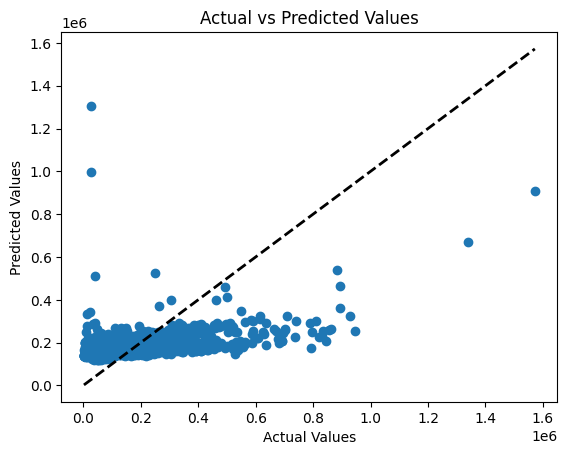

In [11]:
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residual plot: the prediction is not good for data point with predicted value higher than 1e6


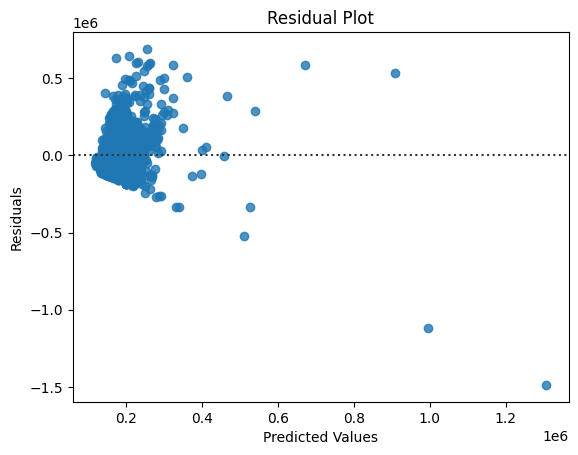

In [12]:
residuals = Y_test - y_pred
sns.residplot(y=residuals,x=y_pred, lowess=False, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Find out the value of no_of_comments for the data points that have large prediction errors
- turns out they have large no_of_comments 
- regularization may help

In [48]:
high_pred_indices = np.where(y_pred > 0.9e6)[0]
no_of_comments_high_pred = X_test.iloc[high_pred_indices, 1]
real_likes_high_pred = Y_test.iloc[high_pred_indices]

for idx, comments, real_likes in zip(high_pred_indices, no_of_comments_high_pred, real_likes_high_pred):
    print(f"Index: {idx}, Predicted likes: {y_pred[idx]}, no_of_comments: {comments}, Real likes: {real_likes}")

Index: 181, Predicted likes: 995341.7644855232, no_of_comments: 1594178219, Real likes: 25761
Index: 287, Predicted likes: 909536.8699269386, no_of_comments: 1551320858, Real likes: 1572139
Index: 818, Predicted likes: 1306517.5419705445, no_of_comments: 1594188061, Real likes: 25350


#### ii. Linear Regression with regularization
- The result is not good as well, test R-squared: 0.196 RMSE: 158126.840 with Ridge regularization and R-squared: 0.196 RMSE: 158126.854 with Lasso regularization
- Another idea: only use no_of_comment as feature and remove a bit more outliers before giving up using linear models
- Yet another idea: use polynomial model
- Yet yet another idea: use CNN to extract features from the images and build a Deep Learning model to make prediction
- Yet yet yet another idea: use CLIP to do multimodal analysis 

In [37]:
validator = KFold(n_splits=5, random_state=42, shuffle=True)
alphas_R = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Try ridge regularization first

In [38]:
RCV = RidgeCV(alphas=alphas_R, cv=validator)
RCV.fit(X_train, Y_train)
Ridge_best_alpha = RCV.alpha_
print('best alpha for ridge regression: ', Ridge_best_alpha)

y_pred_RCV = RCV.predict(X_test)
r2_RCV = r2_score(Y_test, y_pred)
RMSE_RCV = root_mean_squared_error(Y_test, y_pred_RCV)
print(f'Test R-squared: {r2_RCV:.3f}')
print(f'Test RMSE: {RMSE_RCV:.3f}')

best alpha for ridge regression:  1000.0
Test R-squared: 0.196
Test RMSE: 158126.840


Then try Lasso Regularization

In [42]:
LCV = LassoCV(alphas=alphas_R, cv=validator, max_iter=10000, tol=0.001)
LCV.fit(X_train, Y_train)
Lasso_best_alpha = LCV.alpha_
print('best alpha for lasso regression: ', Lasso_best_alpha)

y_pred_LCV = LCV.predict(X_test)
r2_LCV = r2_score(Y_test, y_pred_LCV)
RMSE_LCV = root_mean_squared_error(Y_test, y_pred_LCV)
print(f'Test R-squared: {r2_LCV:.3f}')
print(f'test RMSE: {RMSE_LCV:.3f}')

best alpha for lasso regression:  1000.0
Test R-squared: 0.196
test RMSE: 158126.854
